In [8]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt


In [2]:
Fs = 2000
Ts = 1 / Fs
te = 1.0
t = np.arange(0.0, te, Ts)

In [3]:
x = np.cos(2 * np.pi * 20 * t)
y = np.cos(2 * np.pi * 50 * t)


In [4]:
z = x + y
N = len(z)

In [5]:
k = np.arange(N)
T = N / Fs
freq = k / T
freq = freq[range(int(N/2))]

In [6]:
yfft = np.fft.fft(z)
yf = yfft / N
yf = yf[range(int(N/2))]

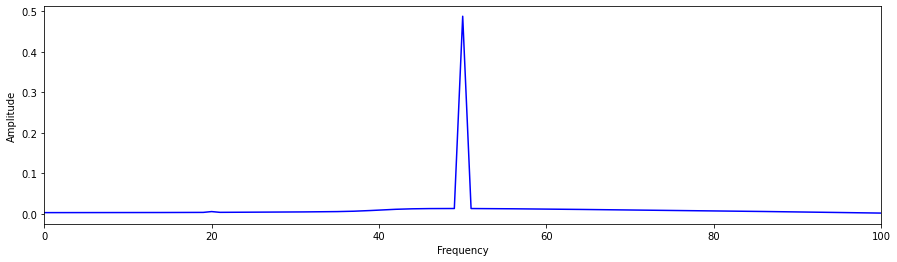

In [13]:
plt.rcParams['figure.figsize']= (15, 4)
plt.plot(freq, abs(yf), 'b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, Fs / 20)
plt.show()

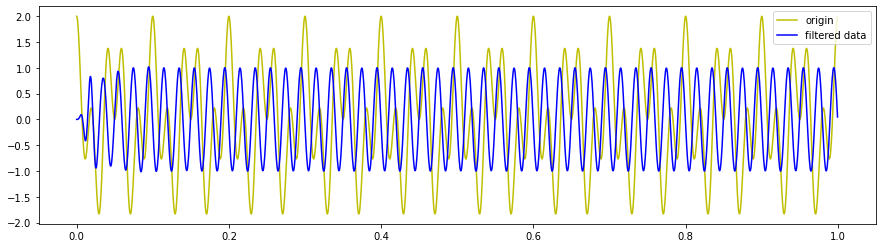

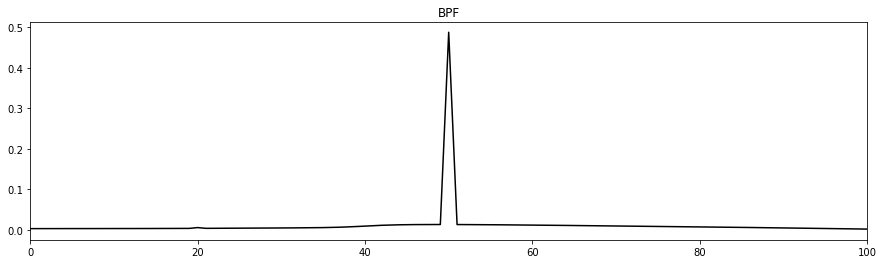

In [14]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


# BPF setting ( 나머지 주파수는 자르고 40 ~ 100 hz 만 추출하겠다.)
lowcut = 40.0
highcut = 100.0
    
# BPF
yy = butter_bandpass_filter(z, lowcut, highcut, Fs, order=5)

# 1. 원 신호 Plot
plt.plot(t, z, 'y', label='origin')

# 2. 필터 적용된 Plot
plt.plot(t, yy, 'b', label='filtered data')
plt.legend()
plt.show() 
    
# 3. 필터 적용된 FFT Plot
yf = np.fft.fft(yy) / N
yf = yf[range(int(N/2))]

plt.title("BPF")
plt.plot(freq, abs(yf), 'k')
plt.xlim(0, Fs / 20)
plt.show()